### Poprawka głównej funkcji

Potrzebne biblioteki

In [11]:
from sklearn.metrics import confusion_matrix, make_scorer
from collections import Counter

Potrzebne stałe

In [12]:
basic_medians = [64.45, 79.65]
basic_discount = 1 - basic_medians[0] / basic_medians[1]

Główna funkcja

In [13]:
def function(y_true, y_pred, medians = basic_medians, discount = basic_discount, basic = True, scoring_only = True):
    
    """
    Jeśli interesuje Cie wartość dodana przyjmij scoring_only = False. Wówczas poza scorem otrzymasz także:
        base_case - najlepszy możliwy scenariusz dla firmy
        standard_case - aktualny scenariusz firmy (bez naszej ingerencji)
        model_vase - scenariusz oparty na naszym modelu

    Jeśli chcesz manipulować zmiennymi medians i discount, pamiętaj aby przyjąć basic = False
    """
    
    
    matrix = confusion_matrix(y_true, y_pred)
    TN = matrix[0][0]
    FP = matrix[0][1]
    FN = matrix[1][0]
    TP = matrix[1][1]
    
    if basic:
        basic_score = 1 - (medians[1]/medians[0]*FN + medians[0]/medians[1]*FP)/(TN + TP)
        
        if scoring_only:
            return basic_score
        else:
            best_case = round(medians[0] * Counter(y_true)[0] + medians[1] * Counter(y_true)[1], 2)
            standard_case = round(medians[0] * Counter(y_true)[0] - medians[1] * Counter(y_true)[1], 2)
            model_case = round(basic_score * medians[0]*(TN+TP), 2)
            return basic_score, best_case, standard_case, model_case
    
    else:
        score = 1 - (medians[1]*FN + (1 - discount)*medians[0]*FP)/(medians[0]*TN + (1- discount)*medians[1]*TP)
        
        if scoring_only:
            return score
        else:
            best_case = round(medians[0] * Counter(y_true)[0] + medians[1] * Counter(y_true)[1], 2)
            standard_case = round(medians[0] * Counter(y_true)[0] - medians[1] * Counter(y_true)[1], 2)
            model_case = round(score * (medians[0]*TN + (1- discount)*medians[1]*TP), 2)
            return score, best_case, standard_case, model_case

In [14]:
slytherin_score = make_scorer(function, greater_is_better=True)

### przykład: jak oszacować profit dla firmy na podstawie modelu

sample_model = ModelClassifier(HIPERPARAMETRY)  
sample_model.fit(X_train, y_train)  


y_pred = sample_model.predict(X_val)  

result = function(y_val, y_pred, scoring_only=False)  
estimate_profit = result[3] - result[2]   

print(estimate_profit)

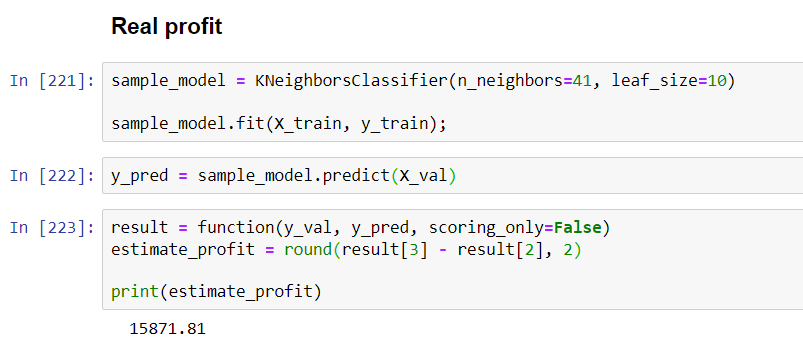